In [24]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# 데이터셋 로드 (파일 이름을 올바르게 설정하세요)
file_path = 'C:/vscode/ML_Practice/Yeho/Clustering/wine-clustering.csv'  # 파일 경로
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [25]:
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])


Series([], dtype: int64)


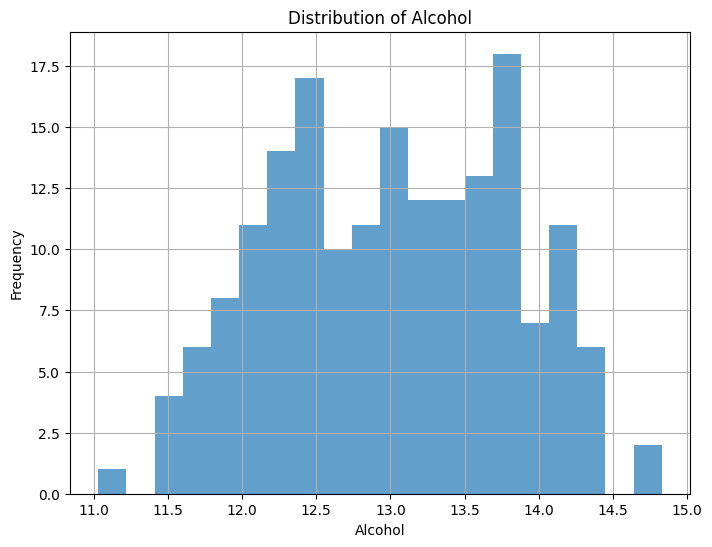

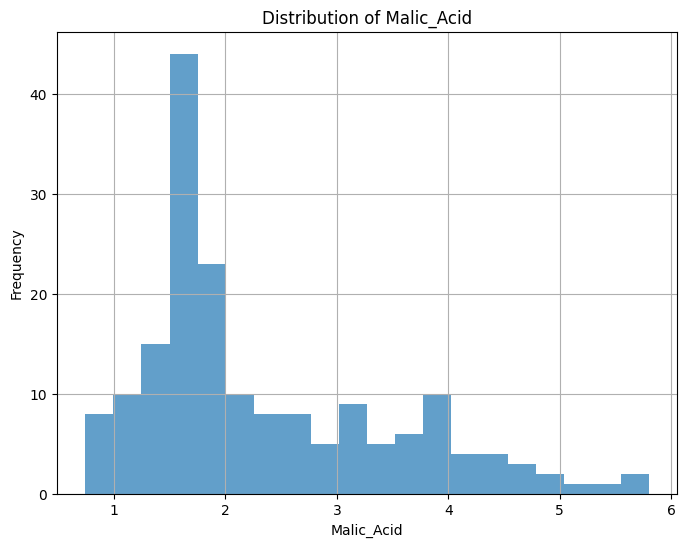

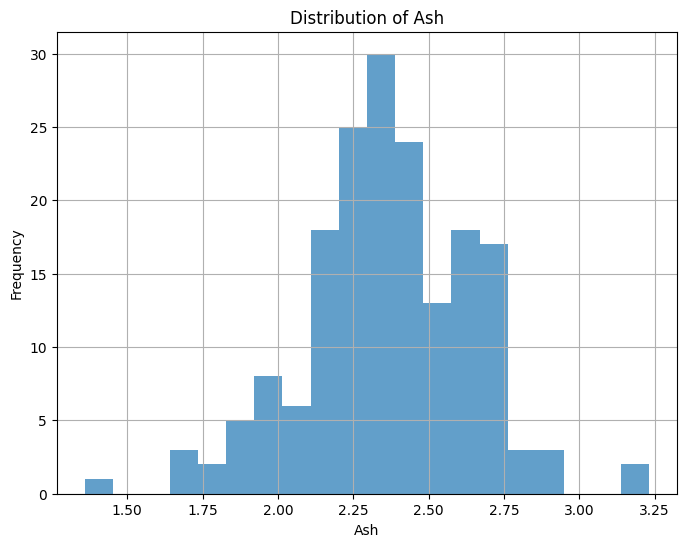

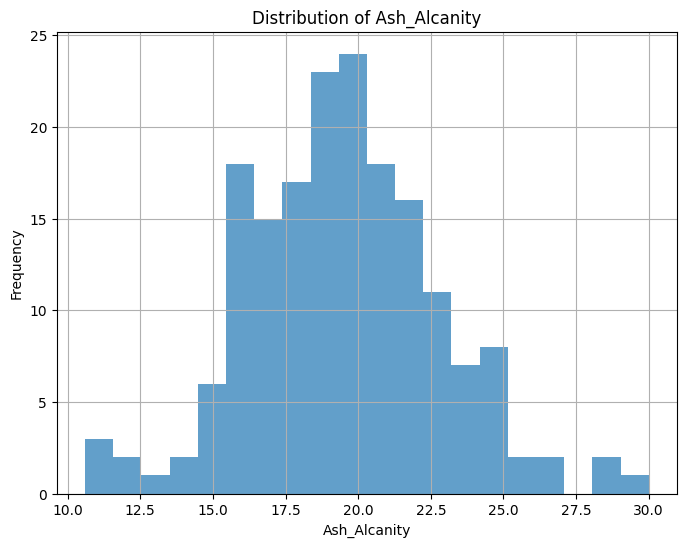

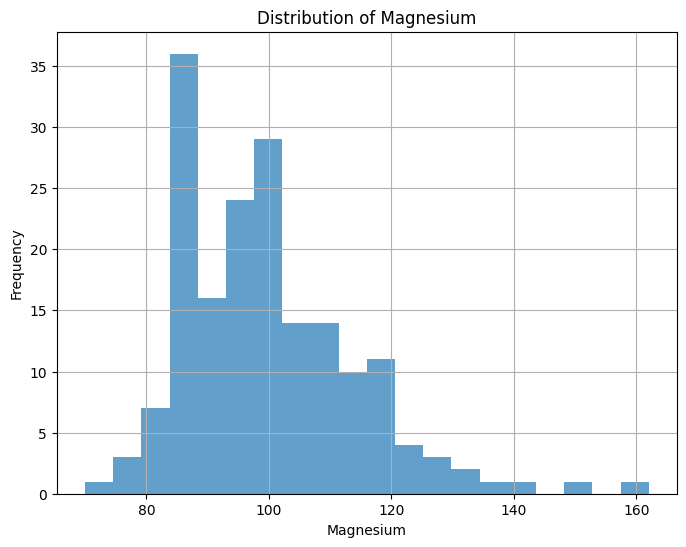

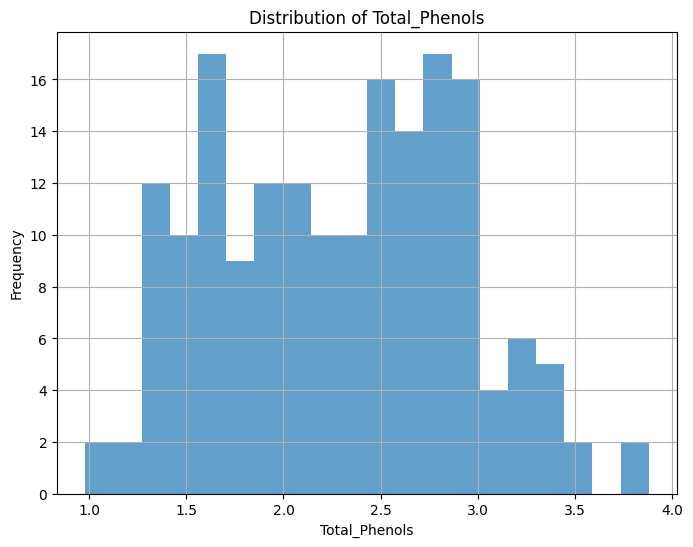

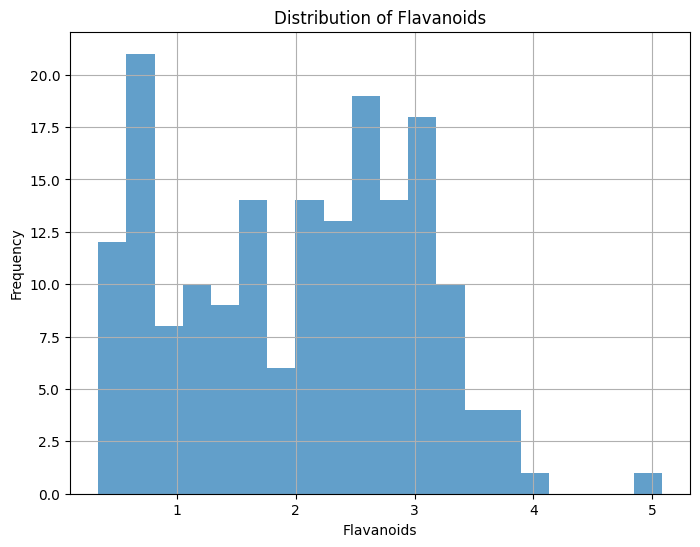

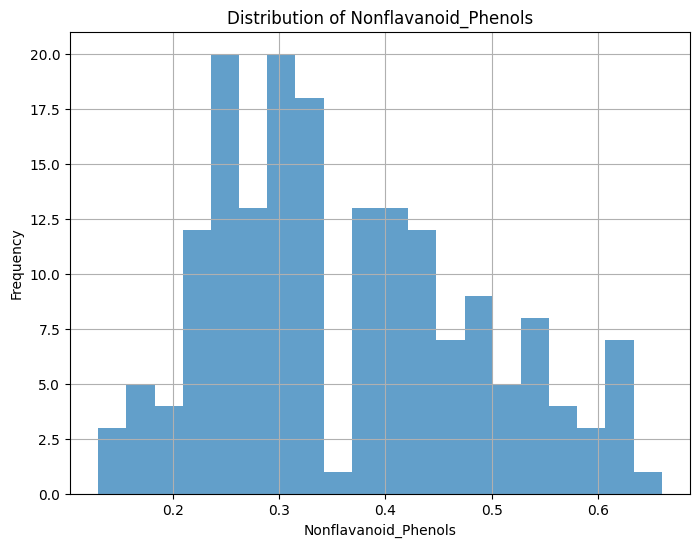

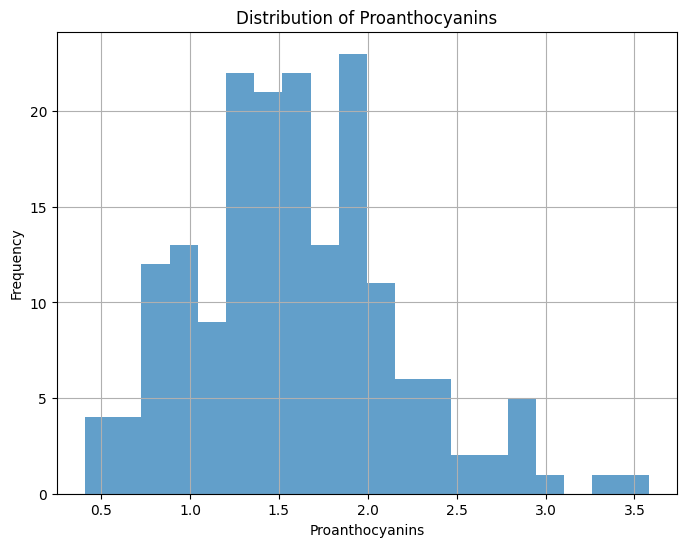

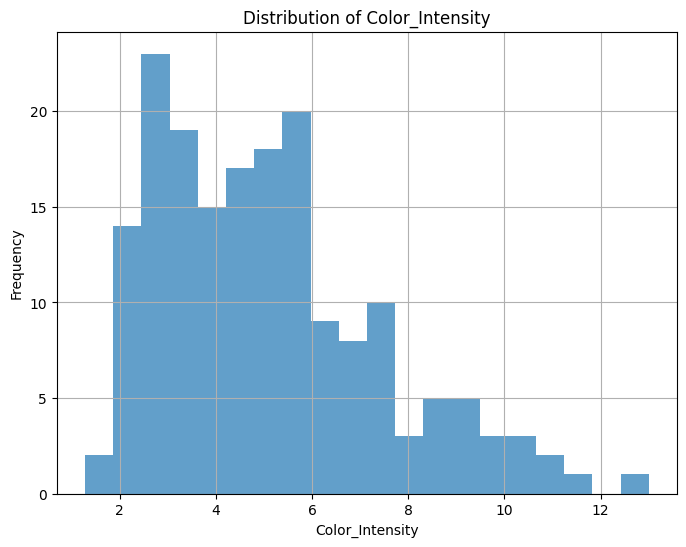

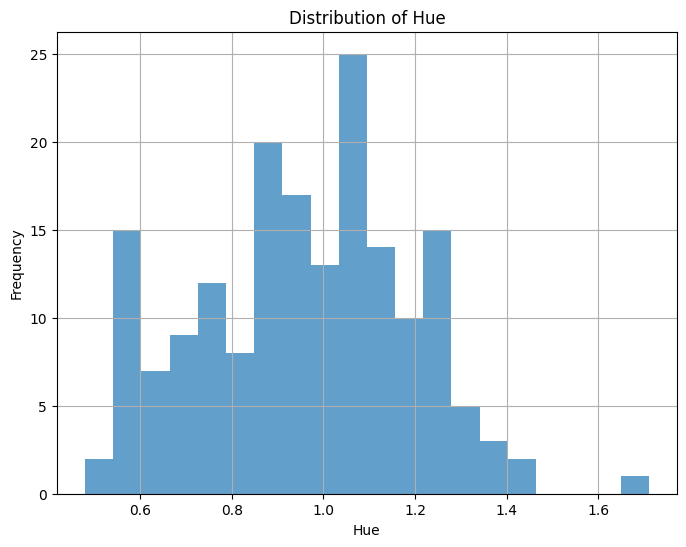

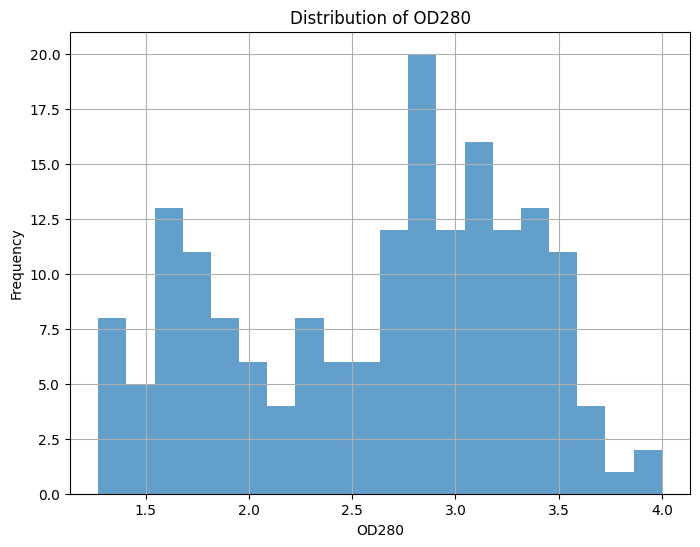

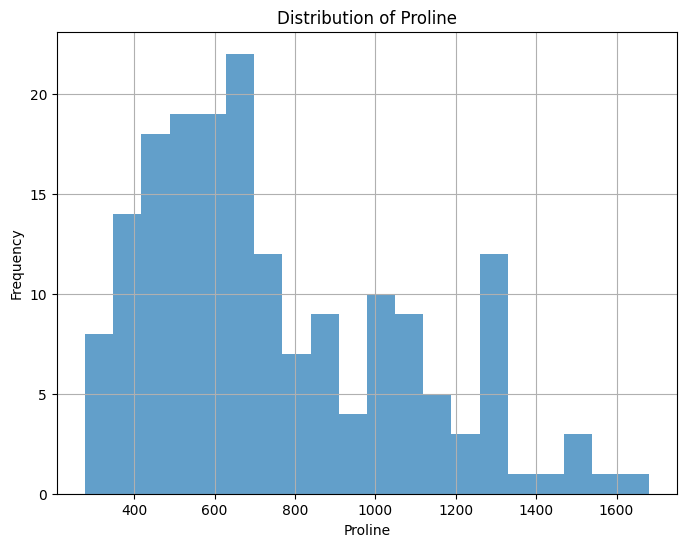

"\nimport matplotlib.pyplot as plt\n\n# Alcohol 열의 히스토그램\ndata['Alcohol'].hist(bins=20, alpha=0.7, color='blue')\nplt.xlabel('Alcohol')\nplt.ylabel('Frequency')\nplt.title('Distribution of Alcohol')\nplt.show()\n"

In [12]:
# 각 열에 대한 히스토그램 플롯
for column in data.columns:
    plt.figure(figsize=(8, 6))
    data[column].hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

'''
import matplotlib.pyplot as plt

# Alcohol 열의 히스토그램
data['Alcohol'].hist(bins=20, alpha=0.7, color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol')
plt.show()
'''


In [26]:
# 선택한 변수
X = data[['Alcohol', 'Malic_Acid', 'Flavanoids', 'Color_Intensity', 'Proline']]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\kirat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kirat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kirat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kirat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

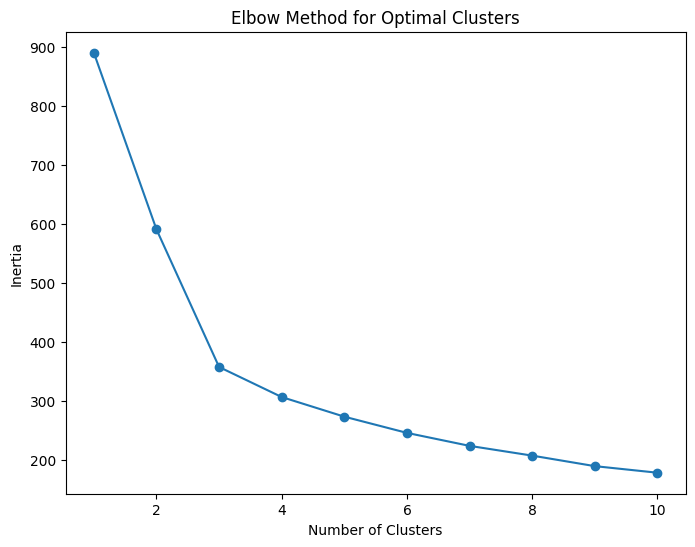

In [27]:
# 최적의 클러스터 수 찾기 (엘보우 방법)
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 차트
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [28]:
# K-Means 군집화 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# 군집 결과 시각화 (PCA 사용)
from sklearn.decomposition import PCA

c:\Users\kirat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

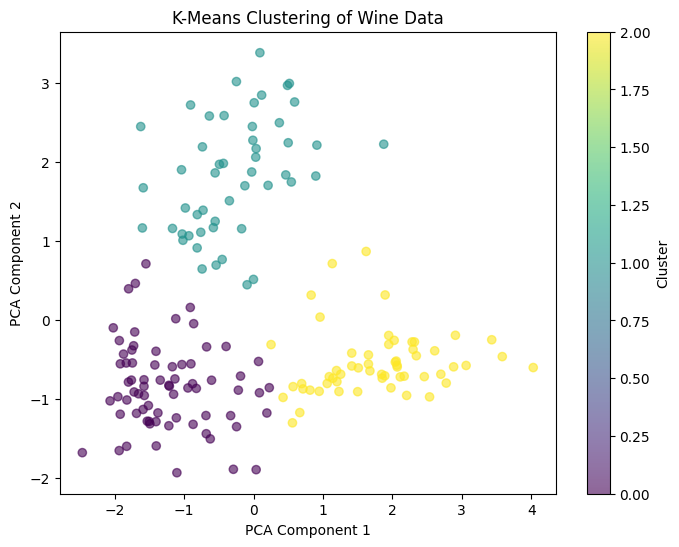

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Wine Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()